In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#loading data
pwd = os.getcwd()
dataframe = pd.read_csv(pwd + '//data/hotel_bookings.csv')
pd.set_option("display.max_column", 40)

### B - EDA and data cleaning

In [4]:
# null values
dataframe.isnull().sum()
#fixing the null values
#if agent value is missing, then customer booked directly. Same for company name if it missing it is assumed it is private customer.
Null_values_fix = {"children" : 0.0, "agent": 'direct booking', "company": 'private', 'country': 'Unspecified'}
dataframe.fillna(Null_values_fix, inplace=True)

#fixing data types
dataframe['children']= dataframe['children'].astype(int)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
dataframe.describe()

#interesting values to investigate

# A- rows with 0 adults & 0 childern & 0 babes
dataframe.loc[(dataframe['adults'] + dataframe['children'] + dataframe['babies'] == 0) & (dataframe['adr'] > 0)]
# rows with zero guests and adr >0 is considered data entry mistake & fixed with adult =1
# rows with zero guests and adr =0 is left as cancelled booking
zero_guest_fix = list (dataframe.loc[(dataframe['adults'] + dataframe['children'] + dataframe['babies'] == 0) & (dataframe['adr'] > 0)].index)
dataframe['adults'].iloc[zero_guest_fix] = dataframe['adults'].iloc[zero_guest_fix].replace(0, 1)

# B- rows with negative adr (adr is the rate per room per night)
#one row only, customer was assigned room H instead of room A. replacing the negative adr with 0 
dataframe.loc[dataframe['adr'] < 0]
dataframe['adr'].loc[dataframe['adr'] < 0] = dataframe['adr'].loc[dataframe['adr'] < 0].replace( -6.38, 0)


C:\Users\15146\anaconda3\envs\min_data\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


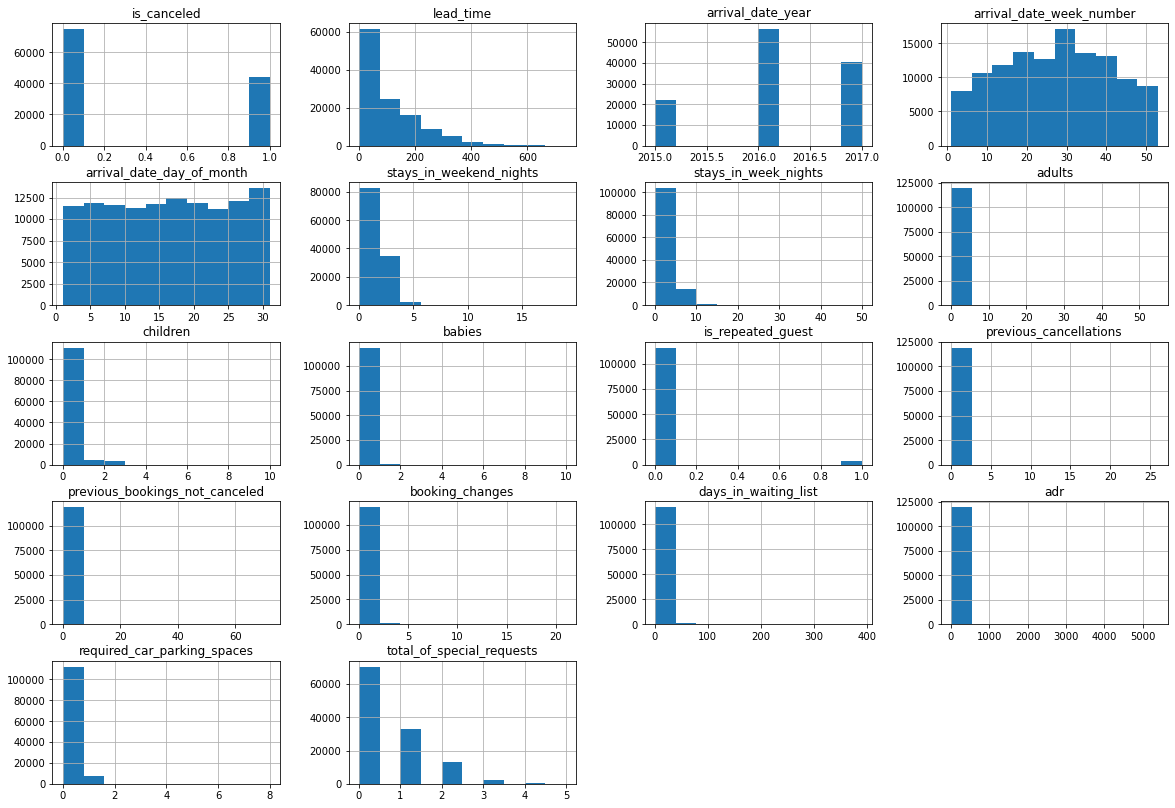

In [6]:
dataframe.hist(figsize= (20, 14))
plt.show()

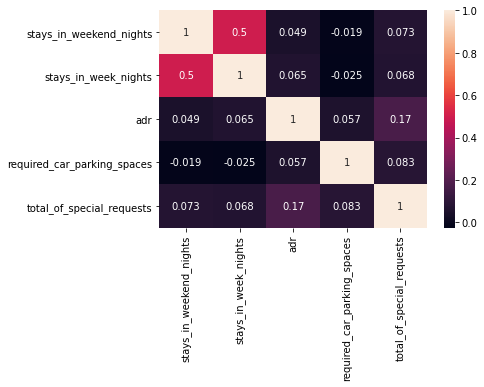

In [7]:
interesting_corr_columns = [ 'stays_in_weekend_nights','stays_in_week_nights',  'adr','required_car_parking_spaces', 'total_of_special_requests']
correlation_matrix = dataframe[interesting_corr_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='adr', ylabel='hotel'>

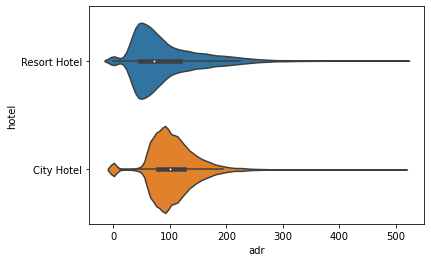

In [8]:
#exploring the daily rate in differtn hotel types
sns.violinplot(x='adr', y='hotel', data=dataframe.loc[dataframe['is_canceled'] == 0])

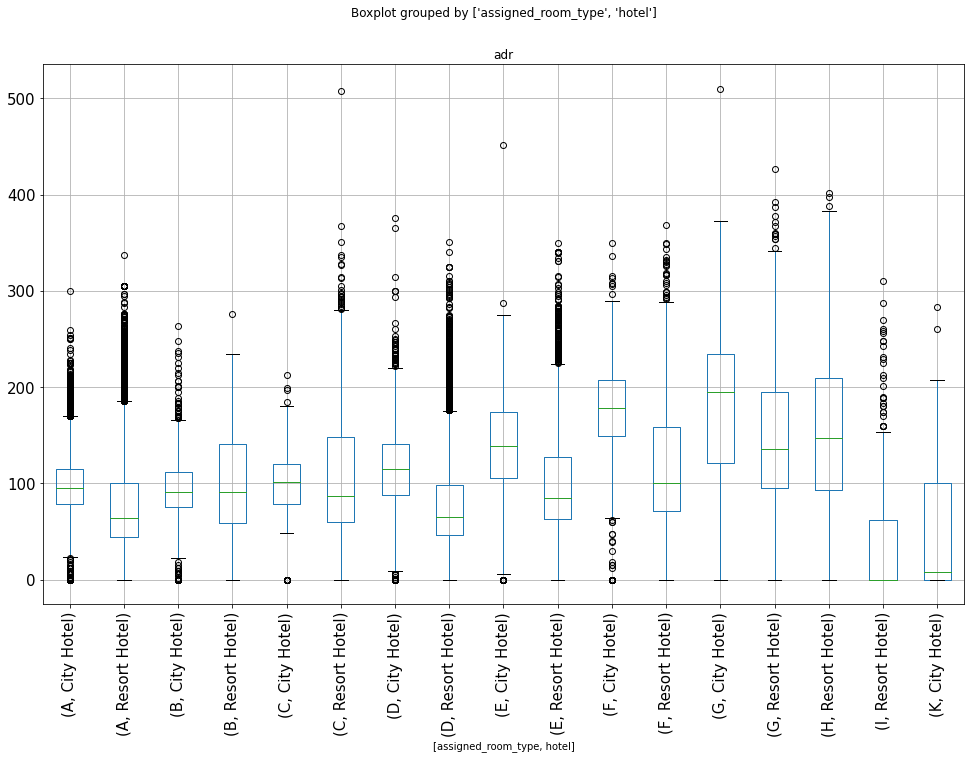

In [9]:
# exploring the diffferent rates (for the uncancelled booking) based on the hotel and room type
dataframe.loc[dataframe['is_canceled'] == 0].boxplot(column= 'adr', by=['assigned_room_type', 'hotel'], figsize = (16,10), fontsize= 15)
plt.xticks(rotation='vertical', size = 15)
plt.show()

In [11]:
#creating contineous arrival date column 
dataframe[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
dataframe['arrival_date'] = dataframe['arrival_date_day_of_month'].map(str) + '-' + dataframe['arrival_date_month'] + '-' + dataframe['arrival_date_year'].map(str)
dataframe['arrival_date'] =pd.to_datetime(dataframe['arrival_date'],format="%d-%B-%Y")

#creating the total stay-in column and revenue per customer
dataframe['total_stay_in'] = dataframe['stays_in_weekend_nights'] + dataframe['stays_in_week_nights']
dataframe['revenue'] = dataframe['total_stay_in'] * dataframe['adr']
dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay_in,revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,direct booking,private,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,0.00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,direct booking,private,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,0.00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,direct booking,private,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,75.00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,private,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,75.00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,private,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,private,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,7,672.98
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,private,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,7,1578.01
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,private,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,7,1103.97
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,private,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,7,730.80


In [12]:
#bsaed on the adr difference between hotel types, I decided to separte df into two datsets
df_resort = dataframe.loc[dataframe['hotel'] == 'Resort Hotel']
df_city = dataframe.loc[dataframe['hotel'] != 'Resort Hotel']

### C - Business Data Analysis

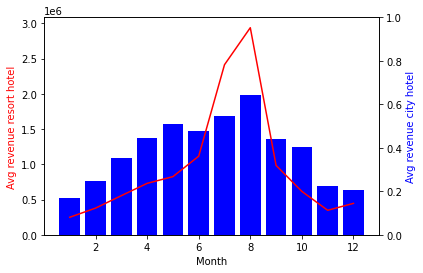

In [52]:
# C-1- Is there any trend in revenue by hotel type? which type of hotel generates more revenue?

#grouping revenue by month
city_revenue = df_city.loc[df_city['is_canceled'] == 0].groupby('arrival_date_month').sum()['revenue'].reset_index()
city_revenue.columns = ['month', 'city_hotel_revenue']
resort_revenue = df_resort.loc[df_resort['is_canceled'] == 0].groupby('arrival_date_month').sum()['revenue'].reset_index()
resort_revenue.columns = ['month', 'resort_hotel_revenue']
avg_monthly_revenue = pd.merge(left = city_revenue, right= resort_revenue, left_on='month', right_on='month')

#sorting dataframe by month
avg_monthly_revenue['month'] = pd.to_datetime(avg_monthly_revenue['month'],format="%B").dt.month
avg_monthly_revenue = avg_monthly_revenue.sort_values(by='month')

#plotting
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(avg_monthly_revenue['month'], avg_monthly_revenue['resort_hotel_revenue'], color = 'r')
ax1.bar(avg_monthly_revenue['month'], avg_monthly_revenue['city_hotel_revenue'], color = 'b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg revenue resort hotel', color = 'r')
ax2.set_ylabel('Avg revenue city hotel' , color = 'b')
plt.show()

## in general city hotels generate more revenue during most of the year. however resort hotels generate higher revenues during the peak summer season


In [ ]:
# C-2- who are the most frequent customers?
## most important cooperative customer

## most important privte cusotomers/tourists pie chart ( contient)

## most important agents

## most busy weeks of the year

##most profitable room type

## most desired room type

## which nationality got the most special requests

## most requested meals

## which nationally stayed longesst

## accupancy over time(retructure the dataframe)

## who the customers who bring childrens and babies

## Market segement distrubtion channel pie chart

##Car parking spaces

## customer type


In [ ]:
# c-3 